<a href="https://colab.research.google.com/github/Yeonsu-Hong/Aiffel_Daegu_AI_project/blob/master/220222_exp14_artist_finding_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 14-9. 프로젝트 - Movielens 영화 추천 실습

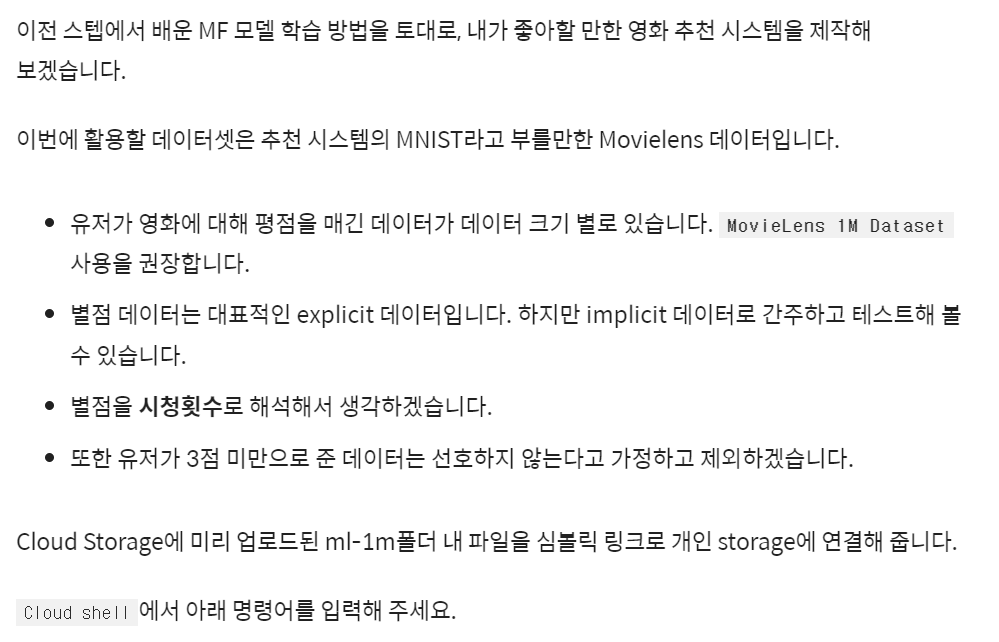

In [2]:
!mkdir -p ~/aiffel/recommendata_iu/data/ml-1m

1) 데이터 준비와 전처리

In [3]:
import pandas as pd
import os
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
ratings.tail()

,user_id,movie_id,ratings,timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [5]:
# 3점 이상만 남깁니다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')


orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [6]:
# ratings 컬럼의 이름을 counts로 바꿉니다.
ratings.rename(columns={'ratings':'counts'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
ratings['counts']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

In [9]:
# 영화 제목을 보기 위해 메타 데이터를 읽어옵니다.
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


rating과 title의 데이터를 분리해서 살폈는데 다시 병합할 필요가 있다.

In [10]:
union_data = pd.merge(movies, ratings)

In [11]:
union_data['title'] = union_data['title'].str.lower() # 검색을 쉽게 하기 위해 영화 제목을 소문자로 바꿔주기
union_data.head(20)

,movie_id,title,genre,user_id,counts,timestamp
0,1,toy story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,toy story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,toy story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,toy story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,toy story (1995),Animation|Children's|Comedy,10,5,978226474
5,1,toy story (1995),Animation|Children's|Comedy,18,4,978154768
6,1,toy story (1995),Animation|Children's|Comedy,19,5,978555994
7,1,toy story (1995),Animation|Children's|Comedy,21,3,978139347
8,1,toy story (1995),Animation|Children's|Comedy,23,4,978463614
9,1,toy story (1995),Animation|Children's|Comedy,26,3,978130703


**2) 분석해 보기**

In [12]:
# ratings에 있는 유니크한 영화 개수
ratings['movie_id'].nunique()

3628

In [13]:
# ratings에 있는 유니크한 사용자 수
ratings['user_id'].nunique()

6039

In [14]:
# 가장 인기 있는 영화 30개 (인기순) ---> 이 부분을 진행하기 위해 column을 병합하였다.

movies_count = union_data.groupby('title')['user_id'].count()
movies_count.sort_values(ascending=False).head(30)


title
american beauty (1999)                                   3211
star wars: episode iv - a new hope (1977)                2910
star wars: episode v - the empire strikes back (1980)    2885
star wars: episode vi - return of the jedi (1983)        2716
saving private ryan (1998)                               2561
terminator 2: judgment day (1991)                        2509
silence of the lambs, the (1991)                         2498
raiders of the lost ark (1981)                           2473
back to the future (1985)                                2460
matrix, the (1999)                                       2434
jurassic park (1993)                                     2413
sixth sense, the (1999)                                  2385
fargo (1996)                                             2371
braveheart (1995)                                        2314
men in black (1997)                                      2297
schindler's list (1993)                                  2257
pr

3) 내가 선호하는 영화를 5가지 골라서 ratings에 추가하자

In [15]:
# 좋아하는 영화 5가지 선정.. 단, 이름은 꼭 데이터 셋에 있는 것과 동일하게 맞춰야한다.
my_favorite = ['men in black (1997)' , 'toy story (1995)' ,'matrix, the (1999)' ,'terminator 2: judgment day (1991)' ,'terminator, the (1984)']

# 내 user_id를 추가
my_playlist = pd.DataFrame({'user_id': ['yeonsu'] * 5, 'title': my_favorite, 'counts':[5]*5})

if not union_data.isin({'user_id': ['yeonsu']})['user_id'].any(): #user_id에 yeonsu 라는 데이터가 없다면, 위에 임으로 만든 my_favorite 데이터를 추가해준다.
    union_data = union_data.append(my_playlist)
    
union_data.tail(10)

,movie_id,title,genre,user_id,counts,timestamp
836473,3952.0,"contender, the (2000)",Drama|Thriller,5682,3,1.029458e+09
836474,3952.0,"contender, the (2000)",Drama|Thriller,5812,4,9.920721e+08
836475,3952.0,"contender, the (2000)",Drama|Thriller,5831,3,9.862231e+08
836476,3952.0,"contender, the (2000)",Drama|Thriller,5837,4,1.011903e+09
836477,3952.0,"contender, the (2000)",Drama|Thriller,5998,4,1.001781e+09
0,NaN,men in black (1997),NaN,yeonsu,5,NaN
1,NaN,toy story (1995),NaN,yeonsu,5,NaN
2,NaN,"matrix, the (1999)",NaN,yeonsu,5,NaN
3,NaN,terminator 2: judgment day (1991),NaN,yeonsu,5,NaN
4,NaN,"terminator, the (1984)",NaN,yeonsu,5,NaN


In [16]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = union_data['user_id'].unique()
artist_unique = union_data['title'].unique()


# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자다.

user_to_idx = {v:k for k,v in enumerate(user_unique)}
title_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [17]:
#인덱싱이 잘 되었는지 확인해 보자
print(user_to_idx['yeonsu']) 
print(title_to_idx['terminator, the (1984)'])

6039
1122


In [18]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = union_data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(union_data): #모든 row가 정상적으로 인덱싱 되었ㄷ면 
    print('user_id column indexing OK!!')
    union_data['user_id'] = temp_user_data #data['user_id']을 인덱싱된 Series로 교체해준다
else:
    print('user_id column indexing Fail')
    
#title_to_idx를 통해 title 컬럼도 동일한 방식으로 인덱싱해준다.
temp_title_data = union_data['title'].map(title_to_idx.get).dropna()
if len(temp_title_data) == len(union_data):
    print('title column indexing OK!!')
    union_data['title'] = temp_title_data
else:
    print('title column indexing Fail!!')

union_data

user_id column indexing OK!!
title column indexing OK!!


,movie_id,title,genre,user_id,counts,timestamp
0,1.0,0,Animation|Children's|Comedy,0,5,978824268.0
1,1.0,0,Animation|Children's|Comedy,1,4,978237008.0
2,1.0,0,Animation|Children's|Comedy,2,4,978233496.0
3,1.0,0,Animation|Children's|Comedy,3,5,978225952.0
4,1.0,0,Animation|Children's|Comedy,4,5,978226474.0
...,...,...,...,...,...,...
0,NaN,1419,NaN,6039,5,NaN
1,NaN,0,NaN,6039,5,NaN
2,NaN,2325,NaN,6039,5,NaN
3,NaN,569,NaN,6039,5,NaN


union_data의 user_id와 타이틀 컬럼내 값들이 모두 정수 인덱스 값으로 잘 변경되었으니 이것으로 훈련을 위한 전처리가 완료되었다.

In [19]:
import scipy

In [ ]:
# pip install scipy --upgrade

In [20]:
scipy.__version__

'1.7.3'

In [21]:
from scipy.sparse import csr_matrix

num_user = union_data['user_id'].nunique()
num_title = union_data['title'].nunique()

csr_data = csr_matrix((union_data.counts, (union_data.user_id, union_data.title)), shape= (num_user, num_title))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

# ** 향후 재실습하면서 주의해야할 부분..

scipy가 colab에서는 1.6x 대 버전으로 설치가 되어 있다.
이 저 버전에서는 csr_matrix를 만들어서 데이터를 보면 '<class 'numpy.longlong'>으로 되어 있는데

업데이트를 하여 1.7x대 버전을 설치하면

향후 <class.int64>로 뜨게 된다.


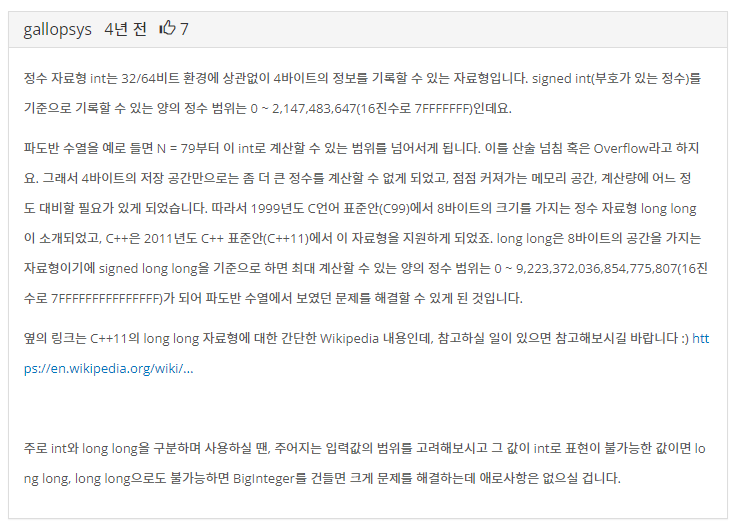


차이점은 이러하고, 숙지하면 될꺼 같다.

reference : https://www.acmicpc.net/board/view/15516

5) als_model = AlternatingLeastSquares 모델을 직접 구성하여 훈련

implicit 설치

In [23]:
!pip install implicit

     |████████████████████████████████| 18.5 MB 1.3 MB/s 


In [25]:
from implicit.als import AlternatingLeastSquares
import numpy as np
import os
#implicit 라이브러리에서 권장하고 있는 부분이다. 학습내용과는 무관하다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'


# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [26]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [27]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

data 양이 적어서 그런지 시간이 거의 걸리지 않는다.

실습은 15분 정도 소요가 되었다.

실습에서 처럼 나의 벡터와 좋아하는 원픽 벡터를 어떻게 만들고 있는지 확인하고 두 벡터를 곱하면 어떤 값이 나오는지 확인하자. 

벡터값에 따른 유사도는 저번 fund에서도 실습하였고 이번 exploration에서도 나온다.

In [28]:
yeonsu, matrix   = user_to_idx['yeonsu'], title_to_idx['matrix, the (1999)']
yeonsu_vector, matrix_vector = als_model.user_factors[yeonsu], als_model.item_factors[matrix]


IndexError: ignored

# 코랩에서는 위와 같은 에러가 계속 발생을 하는데, 혹시나 CSR matrix생성시에 transpose를 하며 벡터 곱이 되지 않게 첫번째 열과 두번째 행의 일치가 일어나지 않아서 발생하는 것이라 생각하여 계속 찾아보다가 주피터에서 실습을 하였는데 정상 동작하였다. 
# 뭐가 문제인지 당췌 알수 없으나, 코랩에서 진행이 힘들어 jupyter로 도중에 진행을 하여 과제를 제출하고자 한다.

In [ ]:
# 주피터에서 colab에서 연결되는 부분 이라고 적힌 부분에서 진행됩니다.